# Novel COVID-19 Chestxray Repository

Link: https://paperswithcode.com/dataset/novel-covid-19-chestxray-repository


## Overview
The Novel COVID-19 Chestxray Repository is the fusion of three publicly available chest-xray image repositories obtained from Github and Kaggle databases. The repository comprises frontal and lateral chest X-ray images used by radiologist in clinical diagnosis. 

The sources of the combined data are described below:

- COVID-19 Radiography Database: The first release of this dataset reports 219 COVID-19,1345 viral pneumonia and 1341 normal radiographic chest X-ray images. This dataset was created by a team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh in collaboration with medical doctors and specialists from Pakistan and Malaysia.This database is regularly updated with the emergence of new cases of COVID-19 patients worldwide. You can find the related paper [here](https://arxiv.org/abs/2003.13145).

- COVID-Chestxray set: Joseph Paul Cohen and Paul Morrison and Lan Dao have created a public image repository on Github which consists both CT scans and digital chest x-rays.The data was collected mainly from retrospective cohorts of pediatric patients from Guangzhou Women and Children’s medical center.With the aid of metadata information provided along with the dataset,we were able to extract 521 COVID-19 positive,239 viral and bacterial pneumonias;which are of the following three broad categories:Middle East Respiratory Syndrome (MERS),Severe Acute Respiratory Syndrome (SARS), and Acute Respiratory Distress syndrome (ARDS);and 218 normal radiographic chest X-ray images of varying image resolutions. See the paper [here](https://arxiv.org/abs/2006.11988).

 - Actualmed COVID chestxray dataset:Actualmed-COVID-chestxray-dataset comprises of 12 COVID-19 positive and 80 normal radiographic chest x-ray images.

The combined dataset includes chest X-ray images of COVID-19, Pneumonia and Normal (healthy) classes, with a total of 752, 1584, and 1639 images respectively.

The data is available on [Kaggle](https://www.kaggle.com/datasets/subhankarsen/novel-covid19-chestxray-repository?select=data).

You can also access the data from my cloud storage [link](https://cloudcape.saao.ac.za/index.php/s/Zx3E3QDS7zNk7gP/download).

## Downloading the data

In [ ]:
!wget https://cloudcape.saao.ac.za/index.php/s/Zx3E3QDS7zNk7gP/download -O chest_xray.zip

## Unzip the data

In [ ]:
!unzip chest_xray.zip

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

import PIL
import pathlib

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

from tensorflow.keras.utils import image_dataset_from_directory

## Viewing the image

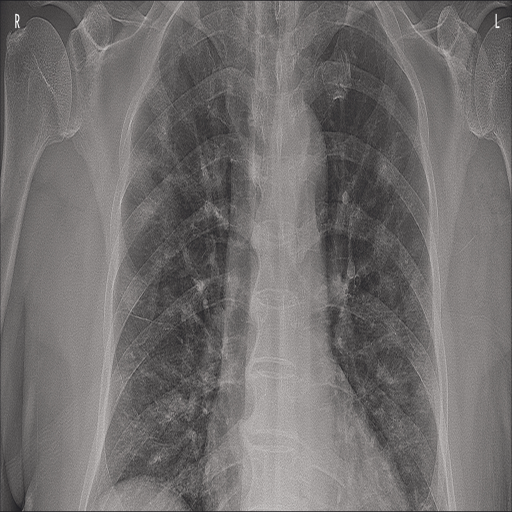

In [3]:
path = './data/Covid/'
name = 'Covid_1.png'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape
X = np.array([x])
X.shape

(1, 299, 299, 3)

## Defining Data Path

In [3]:
data_dir = 'data'
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


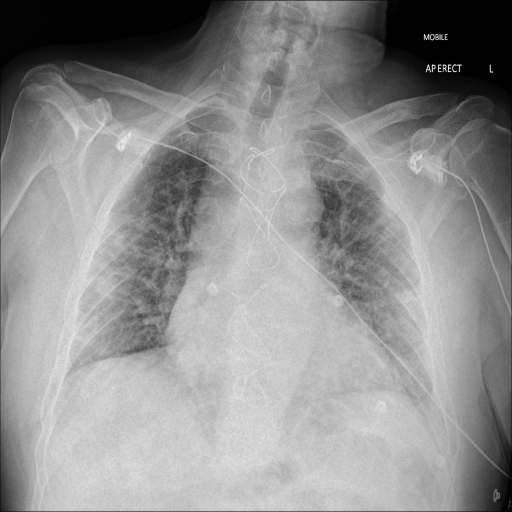

In [7]:
covid = list(data_dir.glob('Covid/*'))
PIL.Image.open(str(covid[0]))

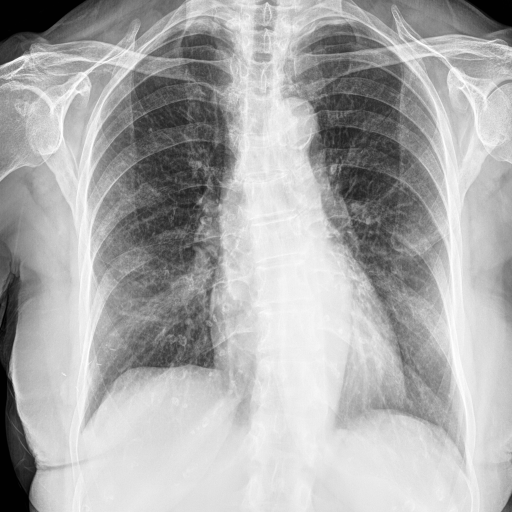

In [8]:
PIL.Image.open(str(covid[1]))

## Defining image size

In [9]:
batch_size = 32
img_height = 150
img_width = 150

## Splitting the image dataset into training and validation sets

In [10]:
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=50,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3975 files belonging to 3 classes.
Using 3180 files for training.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-18 06:18:01.023643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-18 06:18:01.023822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=50,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3975 files belonging to 3 classes.
Using 795 files for validation.


## Viewing class names

In [22]:
class_names = train_ds.class_names
print(class_names)

['Covid', 'Normal', 'Pneumonia']


2022-12-18 05:57:46.198799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


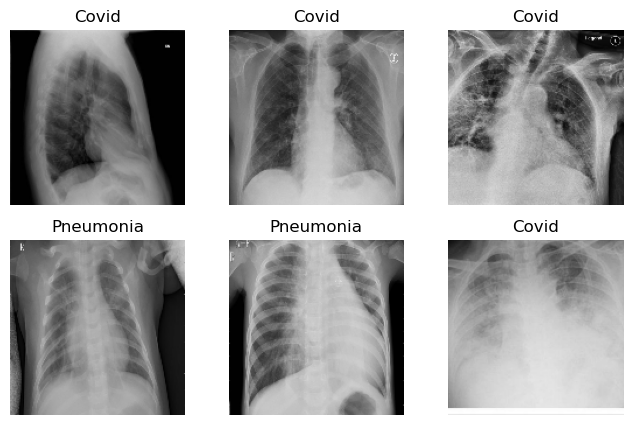

In [10]:
plt.figure(figsize=(8, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

2022-12-18 06:18:50.089175: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 150, 150, 3)
(32,)


## Building a CNN model with Keras

In [14]:
num_classes = len(class_names)

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(num_classes))


model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-12-18 06:19:19.445081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.5439 - accuracy: 0.5651

2022-12-18 06:19:25.955122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 8s 73ms/step - loss: 1.5439 - accuracy: 0.5651 - val_loss: 0.7016 - val_accuracy: 0.6755
Epoch 2/10
100/100 [==============================] - 7s 68ms/step - loss: 0.6004 - accuracy: 0.7638 - val_loss: 0.4753 - val_accuracy: 0.8214
Epoch 3/10
100/100 [==============================] - 7s 68ms/step - loss: 0.4252 - accuracy: 0.8324 - val_loss: 0.3405 - val_accuracy: 0.8679
Epoch 4/10
100/100 [==============================] - 7s 72ms/step - loss: 0.3482 - accuracy: 0.8585 - val_loss: 0.3003 - val_accuracy: 0.8843
Epoch 5/10
100/100 [==============================] - 8s 74ms/step - loss: 0.3264 - accuracy: 0.8689 - val_loss: 0.3171 - val_accuracy: 0.8881
Epoch 6/10
100/100 [==============================] - 7s 69ms/step - loss: 0.2249 - accuracy: 0.9129 - val_loss: 0.4282 - val_accuracy: 0.8906
Epoch 7/10
100/100 [==============================] - 7s 66ms/step - loss: 0.1789 - accuracy: 0.9264 - val_loss: 0.4900 - val_accuracy: 0.8604
Epoch 8/10

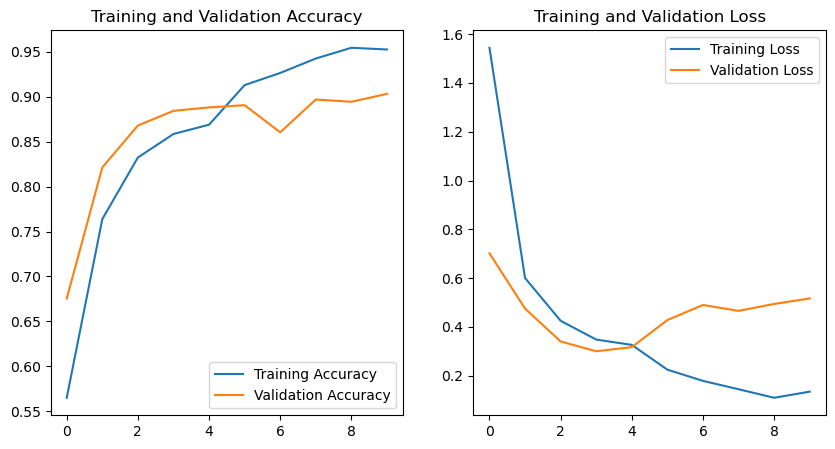

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Tuning

In [ ]:
def make_model(learning_rate=0.01):
    num_classes = len(class_names)

    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(3))
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
del scores[0.1]

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    

    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(size_inner, activation='relu'))
    model.add(keras.layers.Dense(3))
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 500]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.845, 0.86, 0.875, 0.89, 0.92])
plt.legend()
plt.show()

## Regularization and dropout

In [ ]:
def make_model(learning_rate=0.01, size_inner=500, droprate=0.5):
    

    model = keras.models.Sequential()
    model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(droprate))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(size_inner, activation='relu'))
    model.add(keras.layers.Dense(3))
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
learning_rate = 0.001
size = 500

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.79, 0.94)
plt.legend()

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

hist = scores[0.8]
plt.plot(hist['val_accuracy'], label=0.8)

plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

hist = scores[0.8]
plt.plot(hist['val_accuracy'], label=0.8)

plt.legend()

## Data augmentation

In [17]:
resize_and_rescale = keras.Sequential([
    keras.layers.Resizing(img_height, img_width,),
    keras.layers.Rescaling(1./255)
])

In [18]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

2022-12-18 06:22:24.676272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:25.251143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:25.827751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:26.328356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:26.878907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:27.365876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:27.934628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:28.438689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:29.001369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:29.500416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:30.059734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:30.559965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:31.131780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:31.642862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:32.375298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:32.876625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:33.477374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-12-18 06:22:33.990464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


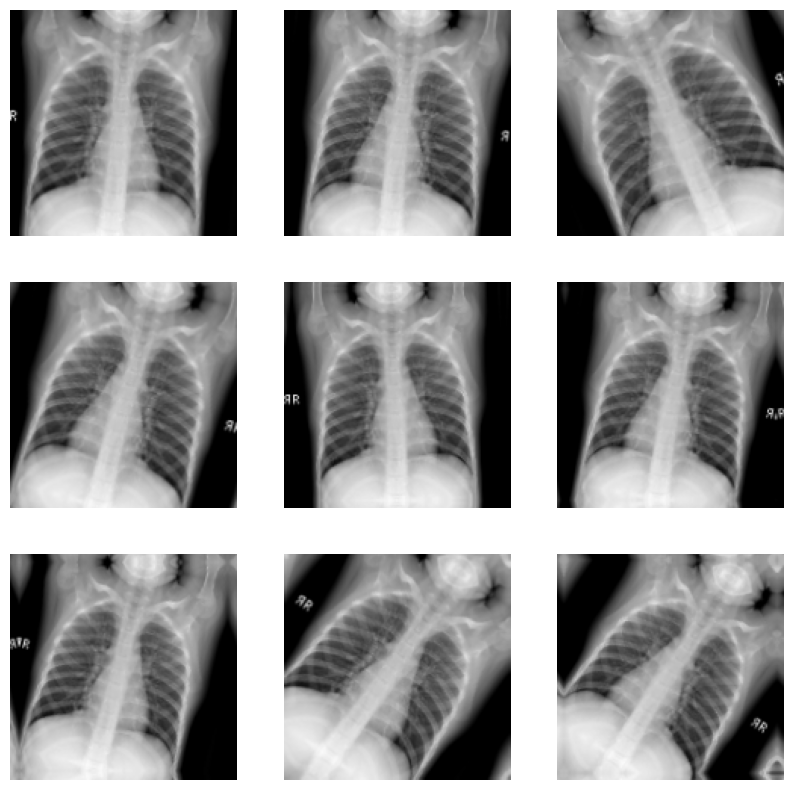

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [20]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    
    model = keras.models.Sequential()
    model.add(resize_and_rescale)
    model.add(data_augmentation)
    #model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(droprate))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(size_inner, activation='relu'))
    model.add(keras.layers.Dense(3))
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [21]:
learning_rate = 0.001
size = 500
droprate = 0.80

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    use_multiprocessing=True,
    workers=16,
    # steps_per_epoch=601,
    # validation_steps = 209,
    #steps_per_epoch= train_ds.samples//train_ds.batch_size,  ######  Here
    #validation_steps= val_ds.samples//val_ds.batch_size,
)

Epoch 1/20


2022-12-18 06:23:47.251550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.8312 - accuracy: 0.6204

2022-12-18 06:24:26.572052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 42s 393ms/step - loss: 0.8312 - accuracy: 0.6204 - val_loss: 0.5058 - val_accuracy: 0.8000
Epoch 2/20
100/100 [==============================] - 40s 397ms/step - loss: 0.5982 - accuracy: 0.7635 - val_loss: 0.3881 - val_accuracy: 0.8654
Epoch 3/20
100/100 [==============================] - 41s 407ms/step - loss: 0.5375 - accuracy: 0.7796 - val_loss: 0.3864 - val_accuracy: 0.8453
Epoch 4/20
100/100 [==============================] - 40s 399ms/step - loss: 0.4799 - accuracy: 0.8110 - val_loss: 0.4106 - val_accuracy: 0.8377
Epoch 5/20
100/100 [==============================] - 40s 397ms/step - loss: 0.4631 - accuracy: 0.8135 - val_loss: 0.3342 - val_accuracy: 0.8792
Epoch 6/20
100/100 [==============================] - 40s 400ms/step - loss: 0.4437 - accuracy: 0.8214 - val_loss: 0.3101 - val_accuracy: 0.8868
Epoch 7/20
100/100 [==============================] - 44s 433ms/step - loss: 0.4309 - accuracy: 0.8242 - val_loss: 0.3176 - val_accuracy: 0.8

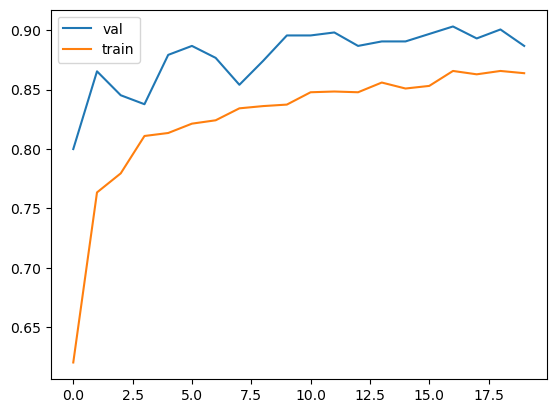

In [22]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')


plt.legend()

## Training a larger model

In [12]:
input_size = 299
batch_size = 32
learning_rate = 0.001
size = 500
droprate = 0.8

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=50,
    image_size=(input_size, input_size),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=50,
  image_size=(input_size, input_size),
  batch_size=batch_size)

Found 3975 files belonging to 3 classes.
Using 3180 files for training.
Found 3975 files belonging to 3 classes.
Using 795 files for validation.


In [6]:

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5, input_size=150):
    resize_and_rescale = keras.Sequential([
    keras.layers.Resizing(input_size, input_size,),
    keras.layers.Rescaling(1./255)])

    data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal",
                      input_shape=(input_size,
                                  input_size,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),])


    model = keras.models.Sequential()
    model.add(resize_and_rescale)
    model.add(data_augmentation)
    #model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2, 2))
    model.add(keras.layers.Dropout(droprate))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(size_inner, activation='relu'))
    model.add(keras.layers.Dense(3))
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

## Checkpointing

In [13]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xray_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/20


2022-12-18 07:17:32.463677: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-18 07:17:32.466185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.5233

2022-12-18 07:18:36.076056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 69s 656ms/step - loss: 1.0983 - accuracy: 0.5233 - val_loss: 0.6201 - val_accuracy: 0.8000
Epoch 2/20
100/100 [==============================] - 67s 662ms/step - loss: 0.6791 - accuracy: 0.7173 - val_loss: 0.4653 - val_accuracy: 0.8226
Epoch 3/20
100/100 [==============================] - 109s 1s/step - loss: 0.5911 - accuracy: 0.7547 - val_loss: 0.4655 - val_accuracy: 0.8063
Epoch 4/20
100/100 [==============================] - 66s 652ms/step - loss: 0.5436 - accuracy: 0.7855 - val_loss: 0.3475 - val_accuracy: 0.8805
Epoch 5/20
100/100 [==============================] - 68s 678ms/step - loss: 0.4822 - accuracy: 0.8050 - val_loss: 0.3340 - val_accuracy: 0.8830
Epoch 6/20
100/100 [==============================] - 65s 648ms/step - loss: 0.4486 - accuracy: 0.8252 - val_loss: 0.3574 - val_accuracy: 0.8654
Epoch 7/20
100/100 [==============================] - 75s 738ms/step - loss: 0.4220 - accuracy: 0.8333 - val_loss: 0.3172 - val_accuracy: 0.886

## Loading the best saved model

In [64]:
model_name = 'xray_v1_15_0.913.h5'
model_best = keras.models.load_model(model_name)

In [89]:
path = 'data/Pneumonia/Pneumonia_50.png'

In [90]:
img = tf.keras.utils.load_img(
    path, target_size=(input_size, input_size)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_best.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 237ms/step
This image most likely belongs to Pneumonia with a 80.90 percent confidence.


### Convert the Keras Sequential model to a TensorFlow Lite model

In [56]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_best)
tflite_model = converter.convert()

# Save the model.
with open('xray_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/tmpsjurh0pi/assets


INFO:tensorflow:Assets written to: /var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/tmpsjurh0pi/assets
2022-12-20 20:48:43.773973: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-20 20:48:43.774323: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-20 20:48:43.781075: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/tmpsjurh0pi
2022-12-20 20:48:43.793928: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-20 20:48:43.793941: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/tmpsjurh0pi
2022-12-20 20:48:43.839431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-20 20:48:43.848577: I tensorflow/cc/saved_model/load

## Using the Tensor lite model to predict an image

In [57]:
TF_MODEL_FILE_PATH = 'xray_model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [58]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_input'], 'outputs': ['dense_1']}}

In [59]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [62]:
predictions_lite = classify_lite(sequential_input=img_array)['dense_1']
score_lite = tf.nn.softmax(predictions_lite)

In [63]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Covid with a 78.01 percent confidence.


In [84]:
predictions_lite

array([[ 2.1162572 , -0.62631917,  0.5903925 ]], dtype=float32)

In [85]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

softmax(predictions_lite)

array([[0.7801303 , 0.05024368, 0.16962606]], dtype=float32)

## Creating Tensorflow serving for model deployment

In [68]:
tf.saved_model.save(model_best, 'chestxray-model')

INFO:tensorflow:Assets written to: chestxray-model/assets


INFO:tensorflow:Assets written to: chestxray-model/assets


In [69]:
!saved_model_cli show --dir chestxray-model --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['sequential_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 299, 299, 3)
        name: serving_default_sequential_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 3)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
        

## Additional operations for dealing with deployed model

In [71]:
import grpc

import tensorflow as tf

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

from keras_image_helper import create_preprocessor

In [98]:
host = 'localhost:8500'

channel = grpc.insecure_channel(host)

stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [99]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [153]:
url = 'https://cloudcape.saao.ac.za/index.php/s/u5CJ4KfGKICKfDS/download'
#X = preprocessor.from_url(url)

from PIL import Image
import requests

# img = Image.open(requests.get(url, stream=True).raw)

# img = img.resize((299, 299), Image.Resampling.NEAREST)


# x = np.array(img, dtype='float32')
# X = np.array([x])

def preprocessor(url):
    img = Image.open(requests.get(url, stream=True).raw)

    img = img.resize((299, 299), Image.Resampling.NEAREST)


    x = np.array(img, dtype='float32')
    X = np.array([x])

    return X

In [154]:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

In [155]:
pb_request = predict_pb2.PredictRequest()

pb_request.model_spec.name = 'chestxray-model'
pb_request.model_spec.signature_name = 'serving_default'

pb_request.inputs['sequential_input'].CopyFrom(np_to_protobuf(X))

In [156]:
#pb_request.inputs['sequential_input'].CopyFrom(np_to_protobuf(img_array))
pb_response = stub.Predict(pb_request, timeout=20.0)

In [157]:
preds = pb_response.outputs['dense_1'].float_val

In [158]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

score_lite = softmax(preds)

In [159]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Pneumonia with a 80.90 percent confidence.


In [160]:
dict(zip(class_names, preds))

{'Covid': 2.683586597442627,
 'Normal': -4.306695461273193,
 'Pneumonia': 4.127780437469482}